In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# تعويض القيم الفارغة
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [6]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

C:\Users\Admin\AppData\Local\Temp\ipykernel_1548\3066670476.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='Set2')


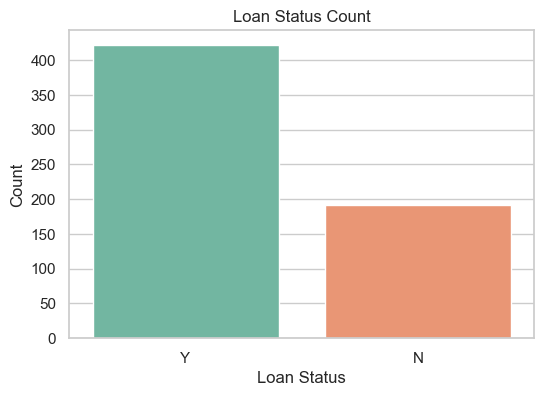

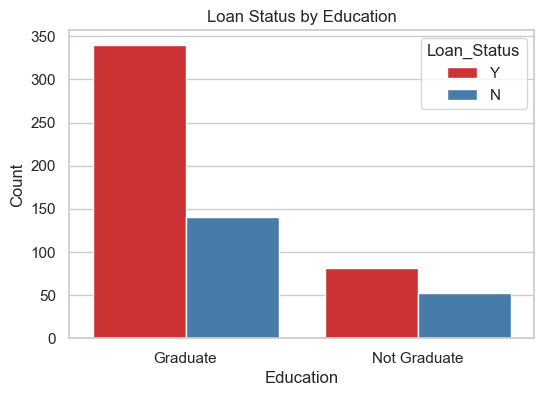

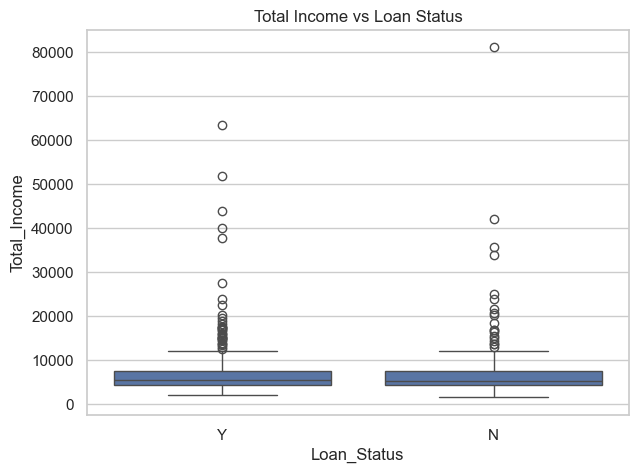

In [12]:
# استيراد المكتبات الأساسية
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# عرض الرسوم البيانية داخل Jupyter
%matplotlib inline

# تحميل البيانات
df = pd.read_csv('train.csv')  # تأكد إن ملف train.csv موجود في نفس مجلد الملف

# عرض أول 5 صفوف للتأكد من البيانات
print(df.head())

# رسم عدد المتقدمين حسب حالة القرض (معتمد / مرفوض)
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# تحليل العلاقة بين التعليم والموافقة على القرض
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='Set1')
plt.title('Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# رسم علاقة الدخل (الزوج + الزوجة) مقابل القرض
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
plt.figure(figsize=(7, 5))
sns.boxplot(x='Loan_Status', y='Total_Income', data=df)
plt.title('Total Income vs Loan Status')
plt.show()


In [20]:
# تحويل الفئات إلى أرقام
data.replace({"Loan_Status": {"N": 0, "Y": 1}}, inplace=True)
data.replace({"Gender": {"Male": 1, "Female": 0}}, inplace=True)
data.replace({"Married": {"Yes": 1, "No": 0}}, inplace=True)
data.replace({"Education": {"Graduate": 1, "Not Graduate": 0}}, inplace=True)
data.replace({"Self_Employed": {"Yes": 1, "No": 0}}, inplace=True)
data.replace({"Property_Area": {"Rural": 0, "Semiurban": 1, "Urban": 2}}, inplace=True)

# معالجة عمود 'Dependents' بدون تحذير
data['Dependents'] = data['Dependents'].replace('3+', 3)
data['Dependents'] = data['Dependents'].fillna(0)
data['Dependents'] = data['Dependents'].astype(int)

In [21]:
X = data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

In [23]:
from sklearn.preprocessing import StandardScaler

# تحويل البيانات إلى نطاق موحد
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب نموذج الانحدار اللوجستي مع البيانات المقاسة
model = LogisticRegression(max_iter=1000, solver='liblinear', C=0.01)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# تقييم النموذج
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7741935483870968
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.81      0.88      0.84        43

    accuracy                           0.77        62
   macro avg       0.74      0.71      0.72        62
weighted avg       0.77      0.77      0.77        62



In [31]:
# نموذج بيانات عميل جديد بدون عمود Total_Income
new_data = {
    'Gender': 1,
    'Married': 1,
    'Dependents': 0,
    'Education': 0,
    'Self_Employed': 0,
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0,
    'Property_Area': 2
}

# تحويل البيانات إلى DataFrame بدون Total_Income
new_df = pd.DataFrame([new_data])

# التنبؤ باستخدام النموذج المدرب
prediction = model.predict(new_df)

# عرض النتيجة
if prediction[0] == 1:
    print("✅ العميل مؤهل للحصول على القرض.")
else:
    print("❌ العميل غير مؤهل للحصول على القرض.")


✅ العميل مؤهل للحصول على القرض.
